## Question 1

Pour ouvrir le fichier nous pouvons utiliser open et plus tard si vous voulez l'ouvrir comme dataframe vous pouvez utiliser le package pandas en utilisant pandas.read()

In [ ]:
file = open("zoo.txt", "r")
out=file.read()

## Question 2

Nous devons d'abord comprendre le problème qui consiste à passer par tous les points d'un nœud ayant une latitude et une longitude. Ce problème peut être résolu en utilisant la connaissance de la théorie des graphes avec le cycle de Hamilton le plus court


nous allons d'abord définir un algorithme pour calculer la distance entre la latitude et la longutude


In [ ]:
import math
from math import sin, cos, sqrt, atan2, radians

class Node(object):
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

        def __str__(self):
            return "point(%s,%s)"%(self.latitude, self.longitude)
        def takeLat(self):
            return self.latitude

        def takeLng(self):
            return self.longitude

        def distance(self, other ):
            #radians which converts from degrees to radian and the compute Haversian formula
            dlat = radians(self.latitude) - radians(other.latitude)
            dlng = radians(self.longitude) - radians(other.longitude)
            a = sin(dlat / 2)**2 + cos(self.latitude) * cos(other.latitude) * sin(dlng / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            # Radius of earth in kilometers. Use 3956 for miles 
            r = 6371
            return (r*c)


Toutes les villes seront des nœuds et nous devons les relier entre elles, ce qui crée un graphe complet et le poids ou la longueur entre deux nœuds est défini par la distance donnée dans la fonction distance.

la fonction small_node vous donnera la petite distance d'un nœud et son successeur

In [ ]:
def small_node(graph, node):
    c=[]
    m=[]
    for x in g.edges(node , data=True):
        c.append(x)
    for i in range(len(c)):
        m.append(c[i][2]['weight'])
    d=min(m)
    for i in range(len(c)):
        if d==c[i][2]['weight']:
            return(c[i][1])

La fonction shortest_path vous donne le chemin le plus court à partir d'un point de départ sans passer par le même nœud et en passant par tous les nœuds

In [ ]:
def shortest_path(graph, node):
    path=[]
    ath=['a']
    mn=['a']
    for i in range(len(graph)):
        k=ath[-1]
        c=mn.pop()
        for x in set(g[k])-set(c):
            if small_node(g,k)==x:
                ath.append(x)
                mn.append(x)
            
        g.remove_node(k) 
        i=i+1 
        
    return ath


# Exemple

nous devons d'abord créer le graphe complet en utilisant un paquet python appelé networkx

In [3]:
import networkx as nx #package  pour dessiner des graphiques et des opérations en théorie des graphes
g = nx.Graph() #définition du graph
g.add_edge('a', 'b', weight=0.1) #les nœuds de liaison et leur poids où l'on peut mettre la fonction "mettre ma distance  
g.add_edge('b', 'c', weight=1.5) 
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2) 
g.add_edge('d', 'b', weight=3.2)
g.add_edge('d', 'e', weight=2.3)
g.add_edge('d', 'a', weight=1.4) 
g.add_edge('e', 'a', weight=0.4) 
g.add_edge('e', 'b', weight=5.0)
g.add_edge('e', 'c', weight=7.4) 

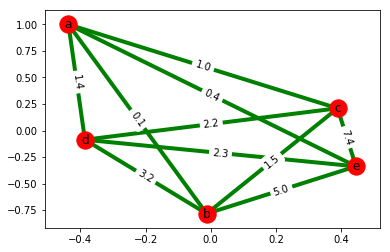

In [5]:
import pylab as plt     # python comme matplotlib 
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos)
labels = nx.get_edge_attributes(g,'weight')
#Please note use of edge_labels below.
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels =labels) #new_labels)
nx.draw_networkx_edges(g,pos,width=4, edge_color='g', arrows=False)

plt.show()

vous devez le charger deux fois pour voir le graphe

In [6]:
def small_node(graph, node):
    c=[]
    m=[]
    for x in g.edges(node , data=True):
        c.append(x)
    for i in range(len(c)):
        m.append(c[i][2]['weight'])
    d=min(m)
    for i in range(len(c)):
        if d==c[i][2]['weight']:
            return(c[i][1])

In [7]:
def shortest_path(graph, node):
    path=[]
    ath=['a']
    mn=['a']
    for i in range(len(graph)):
        k=ath[-1]
        c=mn.pop()
        for x in set(g[k])-set(c):
            if small_node(g,k)==x:
                ath.append(x)
                mn.append(x)
            
        g.remove_node(k) 
        i=i+1 
        
    return ath

In [8]:
 shortest_path(g, 'a')

['a', 'b', 'c', 'd', 'e']